In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [4]:
X = X / 255

In [73]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [74]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

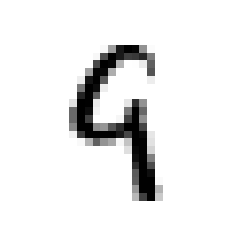

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [76]:
i = 1234
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [79]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [80]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  7.904118123922766
Epoch 100 cost:  0.7315699805382443
Epoch 200 cost:  0.5568564635371003
Epoch 300 cost:  0.4815205145610627
Epoch 400 cost:  0.4358006825260376
Epoch 500 cost:  0.40378325977829704
Epoch 600 cost:  0.379539974267985
Epoch 700 cost:  0.36021898546818054
Epoch 800 cost:  0.34426240885989
Epoch 900 cost:  0.33072898238957354
Epoch 1000 cost:  0.31900272849685746
Epoch 1100 cost:  0.30866264416526207
Epoch 1200 cost:  0.2994130511971086
Epoch 1300 cost:  0.29104177937007597
Epoch 1400 cost:  0.2833930738575464
Epoch 1500 cost:  0.27634930947063335
Epoch 1600 cost:  0.26981966116248923
Epoch 1700 cost:  0.2637331657554964
Epoch 1800 cost:  0.25803395974505045
Epoch 1900 cost:  0.25267750734637484
Final cost: 0.24767634115627413


In [87]:
from sklearn.metrics import classification_report, confusion_matrix

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print()
print(classification_report(predictions, labels))

[[ 950    0    8    0    1    9   10    2    9    3]
 [   0 1106    4    3    1    4    3    7    2    6]
 [   3    1  942   18    2    1    7   28   14    3]
 [   2    1   13  920    0   41    1    8   20   12]
 [   1    1    8    0  904   10    5    5   11   35]
 [  11    2    7   27    5  776   14    1   28   11]
 [   8    5   10    1   14   12  912    1   11    2]
 [   0    5   11   13    3    8    4  954   13   33]
 [   4   13   24   24    5   24    1    2  856   14]
 [   1    1    5    4   47    7    1   20   10  890]]

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       992
           1       0.97      0.97      0.97      1136
           2       0.91      0.92      0.92      1019
           3       0.91      0.90      0.91      1018
           4       0.92      0.92      0.92       980
           5       0.87      0.88      0.87       882
           6       0.95      0.93      0.94       976
           7       0.93      0.91  